# **Exploratory Data Analysis (EDA)**

This notebook explores the NASA C-MAPSS FD002 dataset. It covers sensor behavior, operational settings, engine lifetimes, correlations, and feature selection decisions that set the foundation for modeling Remaining Useful Life (RUL).

In [1]:
import pandas as pd # Import necessary libraries for data analysis and wrangling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
url = "https://raw.githubusercontent.com/Akarsh-Doki/Doki-NASA-engine-failure-ML-project/refs/heads/main/data/raw/FD002.csv"
data = pd.read_csv(url)
data.head(20)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_type,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,train,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,train,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,train,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,train,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,train,NaN
5,1,6,25.0045,0.6205,60.0,462.54,537.02,1266.38,1048.72,7.05,...,7868.87,10.8912,0.02,306,1915,84.93,14.28,8.5590,train,NaN
6,1,7,42.0043,0.8409,100.0,445.00,549.74,1347.45,1127.19,3.91,...,8075.54,9.3753,0.02,330,2212,100.00,10.62,6.4227,train,NaN
7,1,8,20.0020,0.7002,100.0,491.19,607.44,1481.69,1252.36,9.35,...,8049.26,9.2369,0.02,365,2324,100.00,24.33,14.7989,train,NaN
8,1,9,41.9995,0.8407,100.0,445.00,549.33,1348.23,1127.45,3.91,...,8065.78,9.3878,0.02,331,2212,100.00,10.69,6.3802,train,NaN
9,1,10,42.0011,0.8400,100.0,445.00,549.33,1356.40,1127.11,3.91,...,8069.11,9.3957,0.02,329,2212,100.00,10.57,6.2847,train,NaN


In [3]:
data.tail(20)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_type,RUL
87730,259,104,19.9998,0.7009,100.0,491.19,607.90,1479.87,1241.05,9.35,...,8070.70,9.1980,0.02,364,2324,100.00,24.50,14.6824,test,51.0
87731,259,105,20.0008,0.7000,100.0,491.19,607.19,1477.73,1250.40,9.35,...,8071.73,9.2053,0.02,364,2324,100.00,24.60,14.6791,test,51.0
87732,259,106,35.0011,0.8401,100.0,449.44,556.12,1366.85,1121.46,5.48,...,8078.84,9.3306,0.02,333,2223,100.00,14.69,8.9158,test,51.0
87733,259,107,10.0043,0.2517,100.0,489.05,604.61,1495.29,1297.43,10.52,...,8145.47,8.6422,0.03,370,2319,100.00,28.49,17.1865,test,51.0
87734,259,108,42.0014,0.8400,100.0,445.00,549.43,1350.36,1114.88,3.91,...,8096.11,9.3429,0.02,329,2212,100.00,10.51,6.3977,test,51.0
87735,259,109,42.0013,0.8400,100.0,445.00,549.44,1354.35,1128.81,3.91,...,8094.18,9.3750,0.02,331,2212,100.00,10.44,6.3308,test,51.0
87736,259,110,42.0054,0.8400,100.0,445.00,549.48,1353.03,1121.77,3.91,...,8094.72,9.3630,0.02,332,2212,100.00,10.74,6.3856,test,51.0
87737,259,111,0.0024,0.0000,100.0,518.67,642.46,1584.24,1401.20,14.62,...,8147.29,8.4166,0.03,393,2388,100.00,39.08,23.3627,test,51.0
87738,259,112,34.9981,0.8401,100.0,449.44,555.82,1361.42,1121.25,5.48,...,8071.45,9.3046,0.02,334,2223,100.00,14.89,8.9814,test,51.0
87739,259,113,0.0004,0.0003,100.0,518.67,642.69,1591.93,1397.73,14.62,...,8152.40,8.4013,0.03,392,2388,100.00,38.89,23.3397,test,51.0


In [4]:
print(f"Shape of the dataset: {data.shape}")

print(f"Number of engines: {data["unit_number"].nunique()}")

Shape of the dataset: (87750, 28)
Number of engines: 260


In [5]:
grouped_data = data.groupby("unit_number") # Group data by engine unit number
grouped_data.head(30)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_type,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,train,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,train,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,train,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,train,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53468,260,26,41.9995,0.8400,100.0,445.00,549.50,1353.06,1122.14,3.91,...,8079.55,9.3167,0.02,331,2212,100.00,10.52,6.3337,train,NaN
53469,260,27,19.9980,0.7000,100.0,491.19,607.15,1479.75,1249.29,9.35,...,8061.65,9.2101,0.02,364,2324,100.00,24.55,14.6973,train,NaN
53470,260,28,20.0057,0.7017,100.0,491.19,607.59,1479.80,1251.05,9.35,...,8062.83,9.1734,0.02,364,2324,100.00,24.58,14.7325,train,NaN
53471,260,29,10.0024,0.2514,100.0,489.05,604.22,1493.42,1299.57,10.52,...,8132.07,8.6489,0.03,368,2319,100.00,28.65,17.1190,train,NaN


In [6]:
# Print out number of cycles in each engine unit number
grouped_data_size=grouped_data.size()
print(grouped_data_size)
print()

# Print out which unit number has the most amount of cycles
max_index = grouped_data_size.idxmax()
max = grouped_data_size.max()
print(f"Unit {max_index} has the maximum number of cycles of {max}")

# Print out which unit number has the least amount of cycles
min_index = grouped_data_size.idxmin()
min = grouped_data_size.min()
print(f"Unit {min_index} has the minimum number of cycles of {min}")

print()
mean = grouped_data_size.mean()
median = grouped_data_size.median()
standdev = grouped_data_size.std()
print(f"Mean (Average): {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {standdev}")
print()
print(f"All columns of raw dataset: {data.columns}")

unit_number
1      407
2      324
3      371
4      321
5      302
      ... 
256    222
257    508
258    241
259    328
260    316
Length: 260, dtype: int64

Unit 65 has the maximum number of cycles of 573
Unit 244 has the minimum number of cycles of 177

Mean (Average): 337.5
Median: 331.5
Standard Deviation: 78.46355177742693

All columns of raw dataset: Index(['unit_number', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_

sensor_measurement_1        697.738885
sensor_measurement_2       1391.916782
sensor_measurement_3      11227.665193
sensor_measurement_4      14183.795505
sensor_measurement_5         13.087707
sensor_measurement_6         29.567680
sensor_measurement_7      21371.965957
sensor_measurement_8      21076.202075
sensor_measurement_9     112767.429919
sensor_measurement_10         0.016271
sensor_measurement_11        10.437296
sensor_measurement_12     18997.532384
sensor_measurement_13     16383.469441
sensor_measurement_14      7133.557133
sensor_measurement_15         0.560546
sensor_measurement_16         0.000022
sensor_measurement_17       770.443395
sensor_measurement_18     21109.604333
sensor_measurement_19        28.741106
sensor_measurement_20        97.705437
sensor_measurement_21        35.170914
dtype: float64
sensor_measurement_1     6.187415e-03
sensor_measurement_2     1.234325e-02
sensor_measurement_3     9.956479e-02
sensor_measurement_4     1.257792e-01
sensor_measure

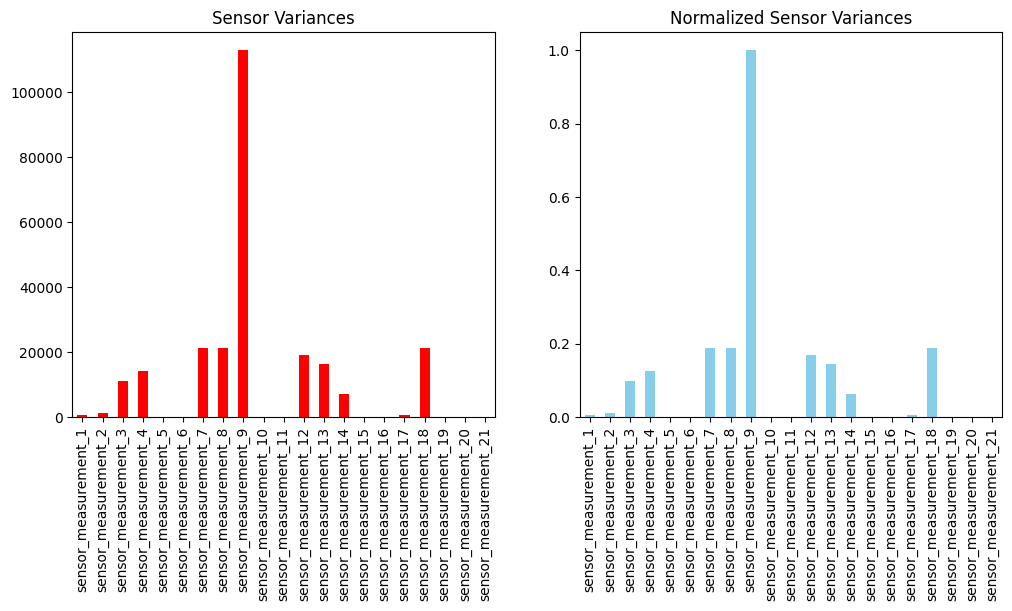

In [7]:
# Variances of each sensor measurement
sensor_cols = [column for column in data.columns if "sensor" in column]
sensor_variances = data[sensor_cols].var()
print(sensor_variances)

# Normalized Variances of each sensor measurement
normalization = (sensor_variances - sensor_variances.min())/(sensor_variances.max() - sensor_variances.min()) # Using Min-Max method
print(normalization)

# Side-by-side bar charts of original and normalized sensor variances, for each sensor
fig,ax=plt.subplots(1,2, figsize=(12,5))
sensor_variances.plot(fig=(12,5),ax=ax[0],kind="bar", color="red")
normalization.plot(fig=(12,5),kind="bar", color="skyblue")
ax[0].set_title("Sensor Variances")
ax[1].set_title("Normalized Sensor Variances")
plt.show()

**Correlation Filtering**

High-dimensional sensor data often contains **redundant signals** (multiple sensors capturing nearly identical patterns. Keeping these redundant features can:
- Increase model complexity unnecessarily
- Slows down training.

To address this, we use correlation diltering to drop highly correlated features:


1.   Seperate **operational settings** and **sensor measurements**.
2.   Compute the **correlation matrix** across all features.
3. Focus only on the **upper triangle** of the matrix (since it's symmetric).
4. Drop any feature pairs with correlation **greater than 0.98**, as there are nearly duplicates and add no unique information.

This ensures our model is trained on a compact and non-redundant feature set, which improves both interpretability and efficiency.

In [8]:
# Define operational and sensor columns
op_cols = [column for column in data.columns if "operational" in column]
sensor_cols = [column for column in data.columns if "sensor" in column]

# Correlation filtering to drop redundant sensors
# Calculate the correlation matrix
corr_features = data[op_cols + sensor_cols]
corr_matrix = corr_features.corr()

# Get the absolute value of the correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Select the upper triangle of the correlation matrix
# (to avoid duplicate pairs since the matrix is symmetric)
upper = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.98
# These features provide redundant information and can be safely removed
to_drop_high_corr = [column for column in upper.columns if any(upper[column] > 0.98)]

print("Dropped sensors (When correlation > 0.98):")
print(to_drop_high_corr)

# Drop highly correlated sensors and the 'dataset_type' column
data = data.drop(columns=to_drop_high_corr)
data = data.drop(columns=["dataset_type"])
print("\n")
data

Dropped sensors (When correlation > 0.98):
['sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_9', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']




,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_8,sensor_measurement_10,sensor_measurement_11,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,2222.65,1.02,42.02,8048.56,9.3461,0.02,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,2211.57,1.02,42.20,8072.30,9.3774,0.02,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1915.11,0.94,36.69,7864.87,10.8941,0.02,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,2211.58,1.02,41.96,8068.66,9.3528,0.02,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1915.10,0.94,36.89,7861.23,10.8963,0.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87745,259,119,35.0015,0.8403,100.0,449.44,555.56,2223.24,1.02,41.96,8088.36,9.3215,0.02,51.0
87746,259,120,42.0066,0.8405,100.0,445.00,549.42,2212.19,1.02,42.00,8108.48,9.3542,0.02,51.0
87747,259,121,42.0061,0.8400,100.0,445.00,549.65,2212.29,1.02,42.15,8098.77,9.3836,0.02,51.0
87748,259,122,0.0024,0.0003,100.0,518.67,642.58,2388.05,1.30,47.47,8161.85,8.4279,0.03,51.0


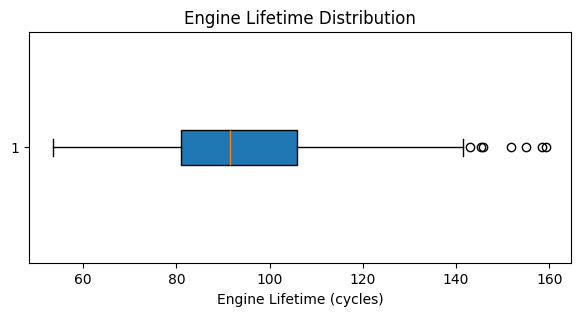

In [9]:
# Box plot of the mean number of lifetime for each engine, in cycles. Used to display spread of the units, as well as the potential outliers

lifetimes = data.groupby("unit_number")["time_in_cycles"].mean()
plt.figure(figsize=(7,3))
plt.boxplot(lifetimes, vert=False, patch_artist=True)
plt.xlabel("Engine Lifetime (cycles)")
plt.title("Engine Lifetime Distribution")
plt.show()

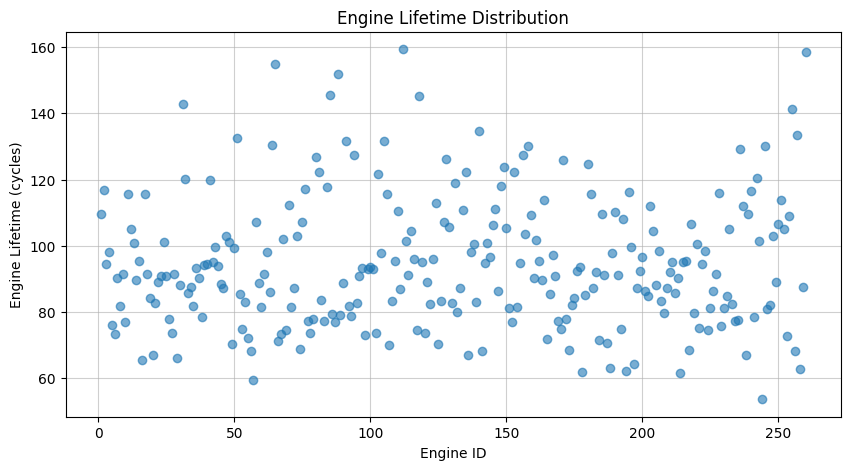

In [10]:
plt.figure(figsize=(10,5))
plt.plot(lifetimes.index, lifetimes.values, "o", alpha=0.6)
plt.xlabel("Engine ID")
plt.ylabel("Engine Lifetime (cycles)")
plt.title("Engine Lifetime Distribution")
plt.grid(True, alpha=0.6)

**Exploring Operational Settings Across Engines**

Before building predictive models, it's important to understand how **operational conditions** (e.g altitude, Mach number, temperature, pressure ratio) vary across various engines. These variables directly affect sensor measurements and engine degredation patters, so analyzing tem ensures the model accounts for **operational variability**.

***In this step:***


1.   **Identify operational setting columns** from the dataset.
2.   **Randomly sample 10 engines** to make the analysis manageable and representative of the rest of the engines
3. **Summarize operational statistics** (mean, standard deviation, min, max) for each selected engine

***Why this matters:***


*   Operational settings differ significantly between engines and flights, introducing natural variability.
*   By summarizing per-engine stats, we can see if some engines consistently operate under harsher conditions, which may **accelerate degredation** and influence RUL
*   This exploration helps avoid **data leakage**, ensuring our model learns from real degredation signals rather than operational differences.

In [11]:
op_columns = [column for column in data.columns if "operational" in column]

# Randomly select 10 engines to inspect their operational settings
# This helps us understand the range, mean, and variation of these inputs
randengines = np.random.choice(data["unit_number"].unique(), size=10)

# Extract data for the selected engines
random_engines_data = data[data["unit_number"].isin(randengines)]

# Summarize operational settings (mean, std, min, max, etc.) per engine
operational_stats = random_engines_data.groupby("unit_number")[op_columns].describe()

# Display stats — useful for understanding how operational conditions differ across engines
print(operational_stats)

            operational_setting_1                                           \
                            count       mean        std     min        25%   
unit_number                                                                  
9                           360.0  23.938981  14.857374  0.0001  10.004400   
21                          317.0  23.261566  14.509803  0.0000  10.004300   
34                          257.0  23.395818  14.920251  0.0001  10.004000   
87                          301.0  23.560852  14.657226  0.0000  10.003800   
104                         369.0  25.019095  14.579790  0.0001  10.005300   
118                         441.0  23.161234  14.772015  0.0000  10.003600   
148                         436.0  23.915755  14.913716  0.0000  10.004775   
170                         264.0  23.286891  15.107422  0.0002  10.003500   
181                         454.0  23.533530  14.916720  0.0001  10.003350   
259                         328.0  23.987498  14.940703  0.0000 

**Heatmap Matrix of the Correlation Coefficients for analysis**

Before training any predictive model, it is important to understand how features relate to each other. Highly correlated features (multicollinearity) can cause redundancy, bias feature importance, and reduce model generalization.

This step uses a correlation heatmap to visually inspect relationships between engine operational settings and sensor measurements.

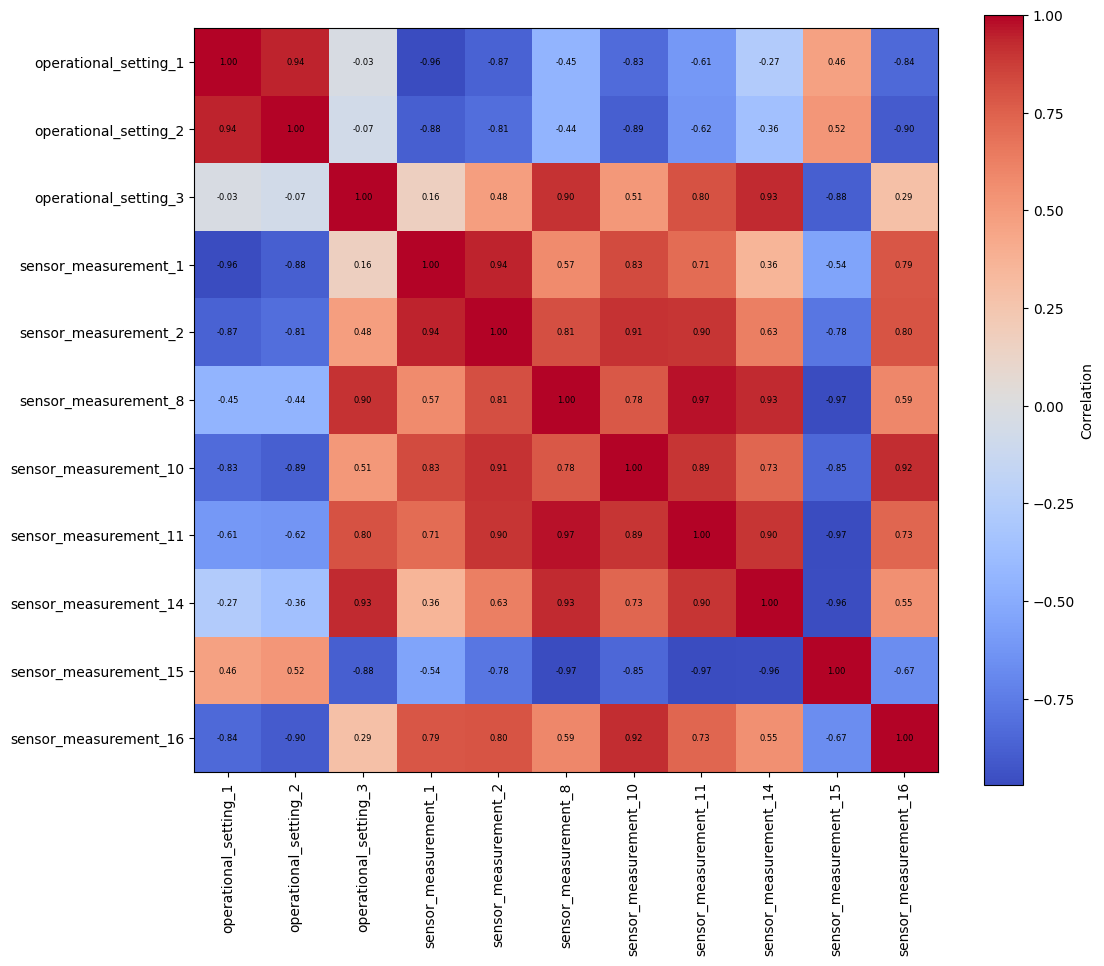

In [12]:
# Separate operational setting columns and sensor measurement columns
op_cols = [column for column in data.columns if "operational" in column]
sensor_cols = [column for column in data.columns if "sensor" in column]

# Combine operational + sensor columns for correlation analysis
corr_features = data[op_cols+sensor_cols]

corr_matrix = corr_features.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Setting ticks with feature names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Add numeric correlation values inside the heatmap cells
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = f"{corr_matrix.iloc[i,j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", color="black",fontsize=6)

**Constructing the Remaining Useful Life Target**

The **Remaining Useful Life (RUL)** is the estimated time left before a component or the entire engine can no longer function correctly and requires replacement or repair.

***Implementing RUL into the model takes several steps:***


1.   **Determine the end-of-life (EoL) for each engine:**
  - For each unit_number, we find the maximum cycle it ran, representing its failure point.
2.   **Calculate RUL for each observation:**
  - *RUL = (engine's max cycle) - (current cycle)*.
  - Each row now has a label showing how close the engine is to failure.
3.  **Cap RUL values (125 cycles):**
  -  Very high RUL values represent “safe zone” operation and do not provide useful failure-related signals.
  - By capping, we reduce model bias toward these safe regions.
4.  **Piecewise linear transformation:**
  - Large RUL values (>50 cycles) are **compressed** to reduce their dominance in training
  - This keeps the model focused on the **critical and medium RUL ranges**, where an accurate prediction is crucial
5.  **Inverse Function:**
  - Defined so predictions can later be mapped back to the original RUL scale.
  - Ensures interpretability for evaluation and reporting.
    
***Why this is important:***
Raw RUL data is very imbalanced, and most engines spend much more time in the "safe" zone than in critical failure zones. Without transformation, the model would learn to minimize error by always predicting high RUL values, missing failures. By capping and scaling, we **balance the prediction task**, aligning aerospace safety requirements where late predictions are much more dangerous than early ones (underestimating risk).

In [13]:
# Step 1: For each engine (unit_number), find the maximum cycle it ran
# This represents the engine's "end-of-life" (failure point)
max_cycles = data.groupby("unit_number")["time_in_cycles"].max().reset_index()
max_cycles.columns = ["unit_number", "max_cycles"]

# Step 2: Merge this back into the main dataset
# Now each row knows the maximum cycle for its engine
data = data.merge(max_cycles, on="unit_number", how="left")

# Step 3: Calculate RUL = (engine's max cycle) - (current cycle)
# This tells us how many cycles are left before failure
data["RUL"] = data["max_cycles"] - data["time_in_cycles"]

# Step 4: Drop the helper column since we no longer need it
data = data.drop(columns=["max_cycles"])

# Step 5: Cap the RUL at 125 cycles
#   - Very large RUL values (safe zone) are not informative for early warnings
#   - This prevents the model from focusing too much on long healthy runs
data["RUL"] = data["RUL"].clip(upper=125)

# Step 6: Apply a piecewise linear scaling for RUL values > 50
#   - High RUL values are compressed by multiplying with a scaling factor
#   - Low RUL values (<= 50) remain unchanged to preserve accuracy near failure
scaling_factor = 0.5
data["RUL_transformed"] = np.where(
    data["RUL"] > 50,
    data["RUL"] * scaling_factor + (50 * (1 - scaling_factor)), # Compress values > 50
    data["RUL"] # keep values <= 50 as they are
    )

# Step 7: Define the inverse transformation function
#   - Needed later to map predictions back to the real RUL scale
def piecewise_linear_inverse(y_transformed, scaling_factor=0.5):
    return np.where(y_transformed > 50 * scaling_factor + (50 * (1 - scaling_factor)),
     (y_transformed - (50 * (1 - scaling_factor))) / scaling_factor,
      y_transformed
      )

# Step 8: Replace the original RUL with the transformed one for training
#   - Model will learn on compressed RUL values
#   - Helps reduce bias toward "safe" zone and improves sensitivity near failure
data["RUL"] = data["RUL_transformed"]
data = data.drop(columns=["RUL_transformed"])

data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_8,sensor_measurement_10,sensor_measurement_11,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,2222.65,1.02,42.02,8048.56,9.3461,0.02,87.5
1,1,2,41.9982,0.8408,100.0,445.00,549.90,2211.57,1.02,42.20,8072.30,9.3774,0.02,87.5
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1915.11,0.94,36.69,7864.87,10.8941,0.02,87.5
3,1,4,42.0077,0.8416,100.0,445.00,549.51,2211.58,1.02,41.96,8068.66,9.3528,0.02,87.5
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1915.10,0.94,36.89,7861.23,10.8963,0.02,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87745,259,119,35.0015,0.8403,100.0,449.44,555.56,2223.24,1.02,41.96,8088.36,9.3215,0.02,68.0
87746,259,120,42.0066,0.8405,100.0,445.00,549.42,2212.19,1.02,42.00,8108.48,9.3542,0.02,67.5
87747,259,121,42.0061,0.8400,100.0,445.00,549.65,2212.29,1.02,42.15,8098.77,9.3836,0.02,67.0
87748,259,122,0.0024,0.0003,100.0,518.67,642.58,2388.05,1.30,47.47,8161.85,8.4279,0.03,66.5
